<a href="https://colab.research.google.com/github/MuhammadAwon/backyard-projects/blob/main/intro-to-deep-learning/transfer_learning_fine_tuning/05_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 Exercises

## Load data

In [ ]:
import os
import random
import zipfile
import pathlib
import glob2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks

In [ ]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

# Unzip data
ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
ref.extractall()
ref.close()

--2021-11-24 10:12:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   112MB/s    in 1.4s    

2021-11-24 10:12:10 (112 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through data directory
for root, dirs, files in os.walk('10_food_classes_10_percent'):
  print(f'Number of directories are {len(dirs)} and files are {len(files)} in path {root}')

Number of directories are 2 and files are 0 in path 10_food_classes_10_percent
Number of directories are 10 and files are 0 in path 10_food_classes_10_percent/train
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/fried_rice
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/hamburger
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/chicken_wings
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/ice_cream
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/pizza
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/ramen
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/sushi
Number of directories are 0 and files are 75 in path 10_food_classes_10_percent/train/chicken_curry
Number of directories are 0 and files are 75 in path 10_food_classes_1

In [ ]:
# Setup train and test directories
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

# Load image data
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    image_size=IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    label_mode='categorical',
    image_size=IMG_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Get class names
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### 1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.

In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = 'food_vision_checkpoint'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True)

In [ ]:
# Load in base model (efficientnetb0)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Integrate base model with our custome model
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
# Model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Fit the model
INITIAL_EPOCHS = 10

history = model.fit(train_data,
                    epochs=INITIAL_EPOCHS,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[checkpoint_callback])

Epoch 1/10
24/24 [==============================] - 33s 711ms/step - loss: 1.8904 - accuracy: 0.3920 - val_loss: 1.3282 - val_accuracy: 0.7132
Epoch 2/10
24/24 [==============================] - 14s 584ms/step - loss: 1.1452 - accuracy: 0.7373 - val_loss: 0.9131 - val_accuracy: 0.7984
Epoch 3/10
24/24 [==============================] - 14s 588ms/step - loss: 0.8380 - accuracy: 0.8053 - val_loss: 0.7435 - val_accuracy: 0.8216
Epoch 4/10
24/24 [==============================] - 14s 585ms/step - loss: 0.6873 - accuracy: 0.8293 - val_loss: 0.6562 - val_accuracy: 0.8360
Epoch 5/10
24/24 [==============================] - 14s 584ms/step - loss: 0.5923 - accuracy: 0.8653 - val_loss: 0.6044 - val_accuracy: 0.8428
Epoch 6/10
24/24 [==============================] - 14s 588ms/step - loss: 0.5247 - accuracy: 0.8853 - val_loss: 0.5687 - val_accuracy: 0.8508
Epoch 7/10
24/24 [==============================] - 14s 593ms/step - loss: 0.4702 - accuracy: 0.8947 - val_loss: 0.5422 - val_accuracy: 0.8516

### 2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [ ]:
# Check the model tunable layers
for num, layer in enumerate(model.layers):
  print(num, layer.name, layer.trainable)

0 input_2 True
1 efficientnetb0 False
2 global_average_pooling2d True
3 dense True


In [ ]:
# Fine tuning the model (unfreeze all the layers first and refreeze except last 20 layers)
base_model.trainable = True

# Refreeze layers except last 20
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [ ]:
# Check trainable layers in base model
for num, layer in enumerate(base_model.layers):
  print(num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # lower learning rate for fine-tuning
              metrics=['accuracy'])

In [ ]:
# Fit model for fine-tuning
fine_tune_epochs = INITIAL_EPOCHS + 10

history_fine_tune_model = model.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=len(test_data),
                                    initial_epoch=history.epoch[-1])

Epoch 10/20
24/24 [==============================] - 25s 661ms/step - loss: 0.7811 - accuracy: 0.8227 - val_loss: 0.4671 - val_accuracy: 0.8544
Epoch 11/20
24/24 [==============================] - 14s 586ms/step - loss: 0.5012 - accuracy: 0.9120 - val_loss: 0.4625 - val_accuracy: 0.8512
Epoch 12/20
24/24 [==============================] - 14s 589ms/step - loss: 0.3952 - accuracy: 0.9373 - val_loss: 0.4543 - val_accuracy: 0.8568
Epoch 13/20
24/24 [==============================] - 14s 590ms/step - loss: 0.3139 - accuracy: 0.9493 - val_loss: 0.4429 - val_accuracy: 0.8600
Epoch 14/20
24/24 [==============================] - 14s 588ms/step - loss: 0.2582 - accuracy: 0.9733 - val_loss: 0.4358 - val_accuracy: 0.8608
Epoch 15/20
24/24 [==============================] - 14s 591ms/step - loss: 0.2175 - accuracy: 0.9680 - val_loss: 0.4300 - val_accuracy: 0.8644
Epoch 16/20
24/24 [==============================] - 14s 595ms/step - loss: 0.1815 - accuracy: 0.9773 - val_loss: 0.4227 - val_accuracy:

In [ ]:
# Evaluate model after 20 epochs
results_last_20_layers = model.evaluate(test_data)
results_last_20_layers

79/79 [==============================] - 11s 130ms/step - loss: 0.4152 - accuracy: 0.8640


[0.41516777873039246, 0.8640000224113464]

In [ ]:
# Compare histories before and after fine-tuning
def compare_histories(original_history, new_history, initial_epoch=10):
  """
  Compares two model history objects
  """
  # Get original history measurements
  loss = original_history.history['loss']
  acc = original_history.history['accuracy']
  print(len(acc))

  val_loss = original_history.history['val_loss']
  val_acc = original_history.history['val_accuracy']

  # Combine original history with new history
  total_loss = loss + new_history.history['loss']
  total_acc = acc + new_history.history['accuracy']
  print(len(total_acc))
  print(total_acc)

  total_val_loss = val_loss + new_history.history['val_loss']
  total_val_acc = val_acc + new_history.history['val_accuracy']

  # Make plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epoch-1, initial_epoch-1],
           plt.ylim(), label='Start Fine Tuning')  # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

  plt.subplot(2,1,2)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epoch-1, initial_epoch-1],
           plt.ylim(), label='Start Fine Tuning')  # doing same thing as above
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('epoch')
  plt.show();

10
21
[0.3919999897480011, 0.737333357334137, 0.8053333163261414, 0.8293333053588867, 0.8653333187103271, 0.8853333592414856, 0.8946666717529297, 0.9120000004768372, 0.9240000247955322, 0.9279999732971191, 0.8226666450500488, 0.9120000004768372, 0.937333345413208, 0.9493333101272583, 0.9733333587646484, 0.9679999947547913, 0.9773333072662354, 0.984000027179718, 0.984000027179718, 0.9906666874885559, 0.9933333396911621]


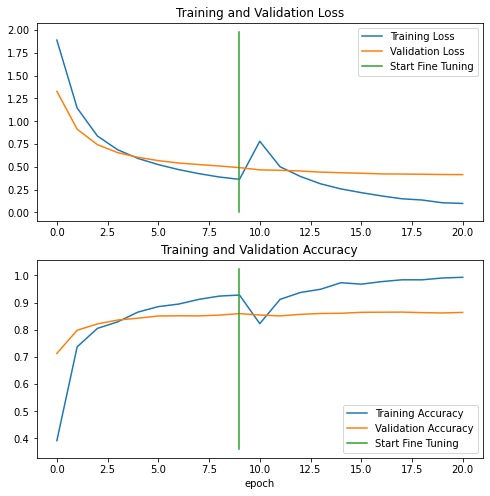

In [ ]:
compare_histories(original_history=history,
                  new_history=history_fine_tune_model)

### 3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [ ]:
# Load the saved weights from checkpoint
model.load_weights('food_vision_checkpoint')

In [ ]:
# Check the model layers
for num, layer in enumerate(model.layers):
  print(num, layer.name, layer.trainable)

0 input_2 True
1 efficientnetb0 True
2 global_average_pooling2d True
3 dense True


In [ ]:
# Unfreeze all layers
base_model.trainable = True

# Refreeze them except last 30 layers this time
for layer in base_model.layers[:-30]:
  layer.trainable = False

In [ ]:
# Check base model layers for confirmation
for num, layer in enumerate(base_model.layers):
  print(num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# Fit the model
fine_tune_epochs = INITIAL_EPOCHS + 10
history_fine_tune_model_2 = model.fit(train_data,
                                      epochs=fine_tune_epochs,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data),
                                      initial_epoch=history.epoch[-1])

Epoch 10/20
24/24 [==============================] - 24s 678ms/step - loss: 0.8619 - accuracy: 0.7987 - val_loss: 0.4657 - val_accuracy: 0.8572
Epoch 11/20
24/24 [==============================] - 14s 597ms/step - loss: 0.5432 - accuracy: 0.9067 - val_loss: 0.4590 - val_accuracy: 0.8504
Epoch 12/20
24/24 [==============================] - 14s 597ms/step - loss: 0.3975 - accuracy: 0.9387 - val_loss: 0.4531 - val_accuracy: 0.8528
Epoch 13/20
24/24 [==============================] - 15s 603ms/step - loss: 0.3280 - accuracy: 0.9480 - val_loss: 0.4446 - val_accuracy: 0.8608
Epoch 14/20
24/24 [==============================] - 14s 597ms/step - loss: 0.2630 - accuracy: 0.9613 - val_loss: 0.4374 - val_accuracy: 0.8612
Epoch 15/20
24/24 [==============================] - 14s 595ms/step - loss: 0.2198 - accuracy: 0.9760 - val_loss: 0.4357 - val_accuracy: 0.8580
Epoch 16/20
24/24 [==============================] - 15s 599ms/step - loss: 0.1671 - accuracy: 0.9787 - val_loss: 0.4332 - val_accuracy:

In [ ]:
# Evaluate model
results_last_30_layers = model.evaluate(test_data)
results_last_30_layers

79/79 [==============================] - 11s 130ms/step - loss: 0.4203 - accuracy: 0.8644


[0.42030155658721924, 0.8644000291824341]

In [ ]:
# Compare 20 layers & 30 layers evaluation results
results = [['20_layers_tunable', results_last_20_layers],
          ['30_layers_tunable', results_last_30_layers]]

all_results = pd.DataFrame(results, columns=['layers', 'results'])
all_results

,layers,results
0,20_layers_tunable,"[0.41516777873039246, 0.8640000224113464]"
1,30_layers_tunable,"[0.42030155658721924, 0.8644000291824341]"


### 4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [ ]:
# Create a function that would grab the image from a dataset,
# visualize it and gives the prediction of it. 
def dataset_visualizer(dataset, model):
  """
  Args:
      dataset: tf.data.Dataset object with (image, label) tuples
      model: the trained model
  
  Returns:
      Visualize the image from the dataset and the prediction class of the image
  """
  image_batch, label_batch = dataset.as_numpy_iterator().next()
  batch_prob = [model.predict(tf.expand_dims(img, axis=0)) for img in image_batch]
  batch_preds = [class_names[np.argmax(prob)] for prob in batch_prob]

  plt.figure(figsize=(10,10))
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    if class_names[np.argmax(label_batch[i])] == batch_preds[i]:
      title_color = 'g'
    else:
      title_color = 'r'
    
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(f'actual: {class_names[np.argmax(label_batch[i])]}, pred: {batch_preds[i]}, prob: {batch_prob[i].max():.2f}', c=title_color)
    plt.axis('off')

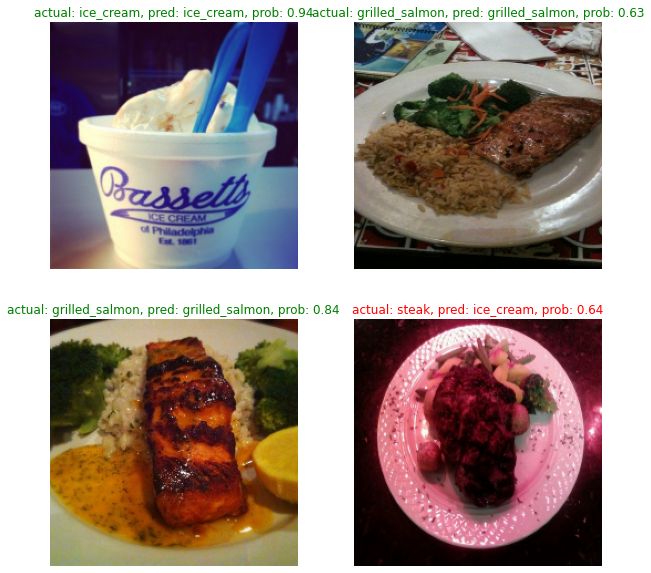

In [ ]:
dataset_visualizer(dataset=test_data,
                   model=model)

## 📖 Extra-curriculum

* Read the [documentation on data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) in TensorFlow.
* Read the [ULMFit paper](https://arxiv.org/abs/1801.06146) (technical) for an introduction to the concept of freezing and unfreezing different layers.
* Read up on learning rate scheduling (there's a [TensorFlow callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) for this), how could this influence our model training?
  * If you're training for longer, you probably want to reduce the learning rate as you go... the closer you get to the bottom of the hill, the smaller steps you want to take. Imagine it like finding a coin at the bottom of your couch. In the beginning your arm movements are going to be large and the closer you get, the smaller your movements become.